# 1. 데이터 파악

In [1]:
cd /content/drive/MyDrive/신용카드 연체 예측

/content/drive/MyDrive/신용카드 연체 예측


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [101]:
df = pd.read_csv("data/train.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [102]:
df.drop(['index'], axis=1, inplace=True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [14]:
df.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [16]:
df.shape

(26457, 19)

### 범주형 변수 파악

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64


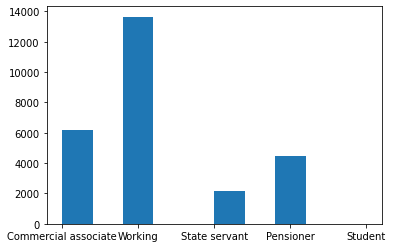

In [36]:
print(df.income_type.value_counts())
plt.hist(df.income_type)
plt.show()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64


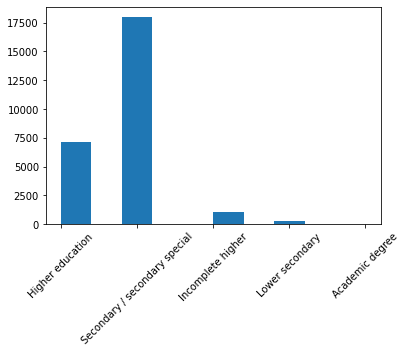

In [41]:
print(df.edu_type.value_counts())
plt.hist(df.edu_type)
plt.xticks(rotation=45)
plt.show()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64


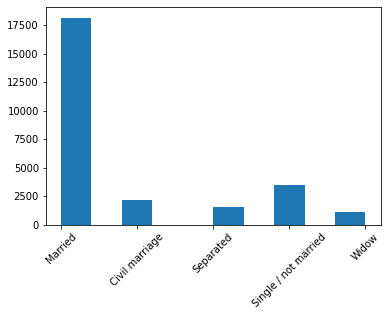

In [42]:
print(df.family_type.value_counts())
plt.hist(df.family_type)
plt.xticks(rotation=45)
plt.show()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64


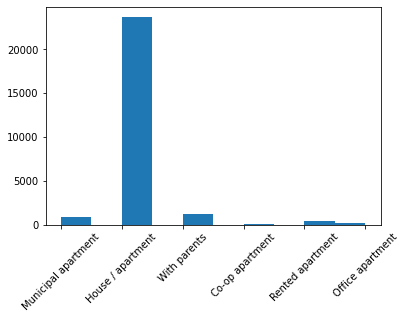

In [43]:
print(df.house_type.value_counts())
plt.hist(df.house_type)
plt.xticks(rotation=45)
plt.show()

In [50]:
print(df.occyp_type.value_counts(dropna=False))

NaN                      8171
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64


In [19]:
df.FLAG_MOBIL.value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

- FLAG_MOBIL 모든 값이 1이므로 제거

In [103]:
df.drop(['FLAG_MOBIL'], axis=1, inplace=True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


### 결측치

In [53]:
df.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [104]:
df[df['income_type']=='Pensioner']['occyp_type'].value_counts(dropna=False)

NaN               4440
Laborers             3
Core staff           2
Medicine staff       1
Accountants          1
Managers             1
Drivers              1
Name: occyp_type, dtype: int64

- income_type이 Pensioner인 행의 occyp_type은 대부분 결측치  
=> 결측 중 income_type이 Pensioner인 사람은 'Pensioner'라는 새로운 occyp_type 지정

In [105]:
df['occyp_type'] = np.where(((pd.notnull(df['occyp_type'])==False) & (df['income_type']=='Pensioner')), 'Pensioner', df['occyp_type'])

In [106]:
df.occyp_type.isnull().sum()

3731

- 남은 3731개의 결측치 처리는 추후 진행

### 파생 변수

In [107]:
# 음수값 절댓값 취해서 양수로 변환

feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    df[feat]=np.abs(df[feat])

In [108]:
# 이해하기 쉽게 나이와 근속년차 변수 생성

df['Age'] = df['DAYS_BIRTH']//365
df['career_year'] = np.ceil(df['DAYS_EMPLOYED']/365)
df['career_start_age'] = df['Age'] - df['career_year']
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Age,career_year,career_start_age
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,38,13.0,25.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,31,5.0,26.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,52,13.0,39.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,41,6.0,35.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,41,6.0,35.0


In [109]:
df[df['income_type']=='Pensioner']['DAYS_EMPLOYED'].value_counts()

365243    4438
5521         1
443          1
586          1
198          1
3680         1
1325         1
673          1
2208         1
2745         1
672          1
620          1
Name: DAYS_EMPLOYED, dtype: int64

- income_type이 Pensioner인 행의 DAYS_EMPLOYED 값이 대부분 이상치(365243)로 설정되어 있는 문제  
=> 

In [118]:
# 연금받는 사람들 나이의 중앙값
a = df[df['income_type']=='Pensioner']['Age'].median()

In [119]:
# 연금받는 사람들이 아닌 사람들 업무 시작 나이의 중앙값
b = df[df['income_type']!='Pensioner']['career_start_age'].median()

=> 연금받는 사람들의 근속년수를 (a-b)로 대체

In [121]:
df['career_year'] = np.where(((df['income_type']=='Pensioner') & (df['DAYS_EMPLOYED']==365243)), (a-b), df['career_year'])

In [123]:
# 이에 맞게 'DAYS_EMPLOYED'도 수정
df['DAYS_EMPLOYED'] = np.where(((df['income_type']=='Pensioner') & (df['DAYS_EMPLOYED']==365243)), (a-b)*365, df['DAYS_EMPLOYED'])

In [126]:
df['career_start_age'] = df['Age'] - df['career_year']
df[df['income_type']=='Pensioner'][['DAYS_EMPLOYED', 'career_year', 'career_start_age']]

,DAYS_EMPLOYED,career_year,career_start_age
14,10585.0,29.0,33.0
18,10585.0,29.0,34.0
21,10585.0,29.0,29.0
24,10585.0,29.0,32.0
46,10585.0,29.0,28.0
...,...,...,...
26431,10585.0,29.0,28.0
26432,10585.0,29.0,32.0
26439,10585.0,29.0,23.0
26441,10585.0,29.0,37.0


In [127]:
df.to_csv("train_ppc.csv")